# Gradient Descent Tutorial: Linear and Logistic Regression


## 🎓 Gradient Descent Tutorial: Understanding Step by Step

Gradient Descent is an optimization algorithm used to minimize a cost function by iteratively moving in the direction of the negative gradient.

Our goal: Minimize a loss function, e.g., MSE (Mean Squared Error), to find the best parameters of a model.

We'll explore this with:
- Intuition (visuals)
- Manual steps
- Code from scratch
- Comparison with sklearn

# Visual Intuition: Gradient on a Simple Function


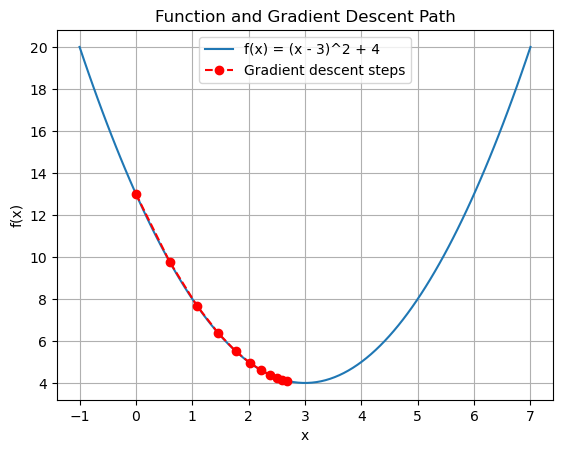

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simple quadratic function: f(x) = (x - 3)^2 + 4
def f(x):
    return (x - 3)**2 + 4

# Its derivative
def df(x):
    return 2 * (x - 3)

# Plot the function
x_vals = np.linspace(-1, 7, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = (x - 3)^2 + 4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Gradient Descent Path')
plt.grid(True)

# Gradient descent steps
x = 0  # start point
alpha = 0.1  # learning rate
x_history = [x]

for _ in range(10):
    x = x - alpha * df(x)
    x_history.append(x)

# Plot steps
y_history = f(np.array(x_history))
plt.plot(x_history, y_history, 'ro--', label='Gradient descent steps')
plt.legend()
plt.show()

## Gradient Descent From Scratch: Linear Regression

Learned parameters: [4.2068268 2.9820652]


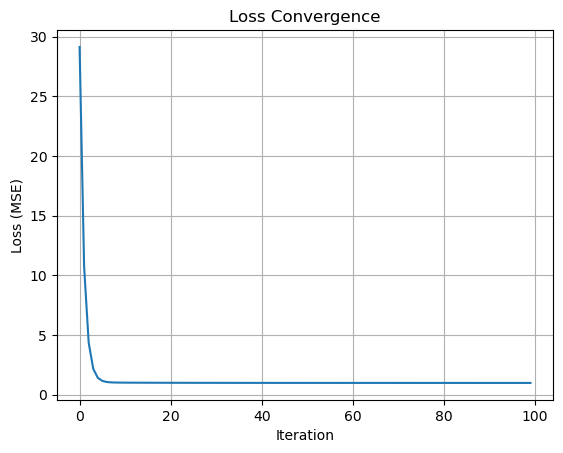

In [5]:
# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Initialize parameters
m = 100
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

# Hyperparameters
learning_rate = 0.1
n_iterations = 100
losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    loss = np.mean((X_b.dot(theta) - y)**2)
    losses.append(loss)

print("Learned parameters:", theta.ravel())

# Plotting Loss Over Iterations

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss Convergence')
plt.grid(True)
plt.show()



## Plotting Loss Over Iterations

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Sklearn parameters:", [lin_reg.intercept_[0], lin_reg.coef_[0][0]])


Sklearn parameters: [4.222151077447231, 2.968467510701019]


## 🔁 Logistic Regression with Interactive Sliders

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from ipywidgets import interact, FloatSlider, IntSlider
from IPython.display import display

# Create binary classification data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=0)
X_b = np.c_[np.ones((X.shape[0], 1)), X]
y = y.reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    eps = 1e-15
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

def run_gradient_descent(lr, n_iter):
    theta = np.zeros((X_b.shape[1], 1))
    losses = []

    for _ in range(n_iter):
        y_hat = sigmoid(X_b @ theta)
        gradient = X_b.T @ (y_hat - y) / y.shape[0]
        theta -= lr * gradient
        loss = compute_loss(y_hat, y)
        losses.append(loss)

    # Plot decision boundary
    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_range = -(theta[0] + theta[1]*x1_range) / theta[2]

    plt.figure(figsize=(12, 4))

    # Subplot 1: decision boundary
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolor='k')
    plt.plot(x1_range, x2_range, 'k--', label='Decision Boundary')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.legend()

    # Subplot 2: loss curve
    plt.subplot(1, 2, 2)
    plt.plot(losses, label='Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Binary Cross-Entropy')
    plt.title('Loss Convergence')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [2]:
interact(run_gradient_descent,
         lr=FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Learning Rate'),
         n_iter=IntSlider(value=100, min=10, max=1000, step=10, description='Iterations'))

interactive(children=(FloatSlider(value=0.1, description='Learning Rate', max=1.0, min=0.01, step=0.01), IntSl…

<function __main__.run_gradient_descent(lr, n_iter)>